## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [17]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,Brazil,United Kingdom,Italy,Mexico,Spain,France,Canada,Germany,India,Sweden,Peru,Russia,Netherlands,Belgium,Iran
5/5/20,2142,571,693,236,236,185,330,118,0,127,85,100,95,86,92,63
5/6/20,2367,650,649,369,197,244,274,112,282,92,87,89,86,36,323,78
5/7/20,2231,602,539,274,257,213,177,121,117,104,99,94,88,84,76,68


worst daily deaths by country evaluating last 7 days:


Country/Region
US                1923.000000
United Kingdom     590.333333
Brazil             456.333333
Italy              288.777778
France             257.777778
Spain              249.777778
Mexico             154.666667
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [3]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 117 kB/s  eta 0:00:01
     |████████████████████████████████| 12.4 MB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 3.3 MB/s eta 0:00:01


In [4]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1577      0 --:--:-- --:--:-- --:--:--  1577
100 73040  100 73040    0     0   250k      0 --:--:-- --:--:-- --:--:--  250k


In [5]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [6]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country/Region,,,,,,,,,,,,,
US,53755,54881,56219,58355,60967,62996,64943,66369,67682,68922,71064,73431,75662
United Kingdom,23635,24055,24393,25302,26097,26771,27510,28131,28446,28734,29427,30076,30615
Italy,26384,26644,26977,27359,27682,27967,28236,28710,28884,29079,29315,29684,29958
Spain,22902,23190,23521,23822,24275,24543,24543,25100,25264,25428,25613,25857,26070
France,22583,22825,23262,23629,24056,24345,24563,24729,24864,25168,25498,25772,25949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Afghanistan,47,50,57,58,60,64,68,72,85,90,95,104,106
Honduras,59,59,61,64,66,71,75,76,82,83,93,99,105
Bolivia,46,50,53,55,59,62,66,71,76,82,86,91,102


In [7]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [8]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country/Region,,,,,,,,,,,,
US,1126,1338,2136,2612,2029,1947,1426,1313,1240,2142,2367,2231
Brazil,229,317,480,430,493,406,349,290,316,571,650,602
United Kingdom,420,338,909,795,674,739,621,315,288,693,649,539
Italy,260,333,382,323,285,269,474,174,195,236,369,274
Mexico,46,83,135,163,127,113,89,93,117,236,197,257
Spain,288,331,301,453,268,0,557,164,164,185,244,213
France,242,437,367,427,289,218,166,135,304,330,274,177
Canada,70,84,83,79,97,163,114,70,75,118,112,121
Germany,99,150,188,153,156,113,76,54,127,0,282,117


In [9]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1126,1338,2136,2612,2029,1947,1426,1313,1240,2142,2367,2231"
data-datasets="229,317,480,430,493,406,349,290,316,571,650,602"
data-datasets="420,338,909,795,674,739,621,315,288,693,649,539"
data-datasets="260,333,382,323,285,269,474,174,195,236,369,274"
data-datasets="46,83,135,163,127,113,89,93,117,236,197,257"
data-datasets="288,331,301,453,268,0,557,164,164,185,244,213"
data-datasets="242,437,367,427,289,218,166,135,304,330,274,177"
data-datasets="70,84,83,79,97,163,114,70,75,118,112,121"
data-datasets="99,150,188,153,156,113,76,54,127,0,282,117"
data-datasets="56,58,69,71,75,69,100,68,175,127,92,104"
data-datasets="2,80,81,107,124,67,16,10,90,85,87,99"
data-datasets="28,54,72,89,108,73,76,86,58,100,89,94"
data-datasets="66,47,73,105,101,96,53,58,76,95,86,88"
data-datasets="66,43,48,145,84,98,94,69,26,86,36,84"
data-datasets="177,113,124,170,93,109,62,79,80,92,323,76"
data-datasets="60,96,71,80,71,63,65

In [10]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Afghanistan,Algeria,Argentina,Austria,Bangladesh,Belarus,Belgium,Bolivia,Brazil,Cameroon,...,Serbia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom,US
5/4/20,5,2,14,2,5,4,80,6,316,0,...,4,7,164,90,22,64,15,11,288,1240
5/5/20,5,5,4,6,1,4,92,4,571,0,...,3,10,185,85,11,59,13,9,693,2142
5/6/20,9,6,9,2,3,5,323,5,650,44,...,3,5,244,87,10,64,11,11,649,2367
5/7/20,2,7,9,1,13,4,76,11,602,0,...,3,8,213,99,5,57,13,8,539,2231


In [11]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1780.571429
United Kingdom     568.428571
Brazil             439.285714
Italy              286.000000
France             245.142857
Spain              226.000000
Mexico             138.857143
dtype: float64

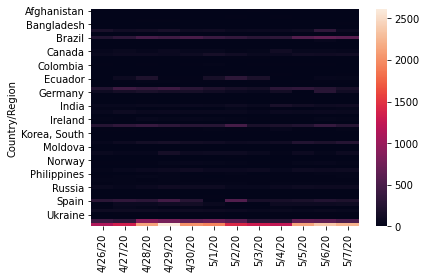

In [12]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

64 6.083333333333333


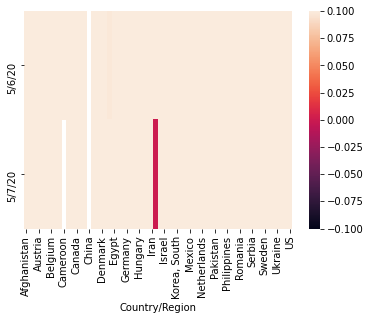

In [13]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [14]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,5/7/20
Country/Region,
Bangladesh,2.648148
Bolivia,2.326923
Indonesia,2.058824
Luxembourg,1.833333
Czechia,1.760000
...,...
Cameroon,0.000000
Malaysia,0.000000
"Korea, South",0.000000


In [15]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [16]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 11.5 MB 8.2 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=94c69943fe48b93ff810ad6fdd474bd2d68922649f57c30df1dbc8325fcaf5b1
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
